<a href="https://colab.research.google.com/github/wqw547243068/wangqiwen/blob/master/Pytorch%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch学习笔记
- ![](https://pytorch.apachecn.org/docs/img/logo.svg)
- [Pytorch官网](https://pytorch.org/)，[官方教程](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)，[PyTorch 1.2 中文文档](https://pytorch.apachecn.org/docs/1.2/)
- [从头了解pytorch简单实现](https://zhuanlan.zhihu.com/p/35557976)
- PyTorch 是一个建立在 Torch 库之上的 Python 包，旨在加速深度学习应用。
- PyTorch 的工作流程非常接近于 Python 的科学计算库 NumPy
-PyTorch 提供一种类似 NumPy 的抽象方法来表征张量（或多维数组），利用 GPU 来加速训练。


## 为什么要用pytorch
- 便于使用的 API：如同 Python 那样简单。
- 支持 Python：正如上文所述，PyTorch 可以平滑地与 Python 数据科学栈相结合。与 NumPy 一样简单，甚至都感觉不出区别。
- 动态计算图：PyTorch 不再采用特定的函数**预定义**计算图，而是提供构建动态计算图的框架，甚至可以在运行时修正。这种动态框架在不知道所构建的神经网络需要多少内存时非常有用。
- 其它优点：还有多 GPU 支持、自定义数据加载器和极简的预处理过程等

## 安装
- 直接执行以下命令
- Colab默认安装torch

In [ ]:
!sudo pip install torch torchvision

## PyTorch CUDA 接口

- PyTorch 的优势之一是为张量和 autograd 库提供 CUDA 接口。使用 CUDA GPU，不仅可以加速神经网络训练和推断，还可以加速任何映射至 PyTorch 张量的工作负载


In [ ]:
import torch
# 是否启用GPU
print(torch.cuda.is_available())

True


In [ ]:
cuda_gpu = torch.cuda.is_available()
if (cuda_gpu):
    print("Great, you have a GPU!")
else:
    print("Life is short -- consider a GPU!")

Great, you have a GPU!


- 使用 cuda 加速代码操作简单。
- 张量上调用 .cuda()，则将执行从 CPU 到 CUDA GPU 的数据迁移。
- 模型上调用 .cuda()，则不仅将所有内部储存移到 GPU，还将整个计算图映射至 GPU。
- 将张量或模型复制回 CPU，比如和 NumPy 交互，可以调用 .cpu()。

In [ ]:
x = torch.cuda.HalfTensor(5, 3).uniform_(-1, 1)
if cuda_gpu:
    x = x.cuda()
    print(type(x.data))

x = x.cpu()
print(type(x.data))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


- PyTorch 是一个张量和动态神经网络 Python 库，它有着极其强大的 GPU 加速性能。我们一般可以直接定义 GPU 张量，也可以由 CPU 张量转化为 GPU 张量

In [ ]:
x = torch.cuda.HalfTensor(5, 3).uniform_(-1, 1)
y = torch.cuda.HalfTensor(3, 5).uniform_(-1, 1)
z = torch.matmul(x, y)
# 以下转化CPU张量为GPU张量
x = torch.FloatTensor(5, 3).uniform_(-1, 1)
print(x)
x = x.cuda(device=0)
print(x)
x = x.cpu()
print(x)

tensor([[ 0.3929,  0.5614,  0.4400],
        [-0.9461,  0.6248,  0.6440],
        [-0.0402,  0.3965, -0.2627],
        [ 0.8909,  0.1333,  0.6253],
        [ 0.2236, -0.2934,  0.6288]])
tensor([[ 0.3929,  0.5614,  0.4400],
        [-0.9461,  0.6248,  0.6440],
        [-0.0402,  0.3965, -0.2627],
        [ 0.8909,  0.1333,  0.6253],
        [ 0.2236, -0.2934,  0.6288]], device='cuda:0')
tensor([[ 0.3929,  0.5614,  0.4400],
        [-0.9461,  0.6248,  0.6440],
        [-0.0402,  0.3965, -0.2627],
        [ 0.8909,  0.1333,  0.6253],
        [ 0.2236, -0.2934,  0.6288]])


## 基本操作


### pytorch工作流
- [从基础概念到实现，小白如何快速入门PyTorch](https://zhuanlan.zhihu.com/p/34072174)
- PyTorch 使用 imperative / eager 的范式，即每一行代码都构建一个图，定义完整计算图的一个部分。即使完整的计算图还没有完成构建，也可以独立地执行这些作为组件的小计算图，这种动态计算图被称为「define-by-run」方法。
- ![](https://pic3.zhimg.com/80/v2-5d56dc3930e0c68b2f1655b18265f172_hd.jpg)

### pytorch基本元素
- PyTorch 元素有 `PyTorch张量`、`数学运算`、`自动求导`模块、`最优化`模块和`神经网络`模块。

### 张量定义
- PyTorch 提供了 CPU 张量和 GPU 张量，并且极大地加速了计算的速度
- PyTorch 的关键数据结构是张量，即多维数组。其功能与 NumPy 的 ndarray 对象类似，可以使用 torch.Tensor() 创建张量
- 从张量的构建与运行就能体会到 PyTorch 相比 TensorFLow 需要声明张量、初始化张量要简洁地多
-  PyTorch 是一种动态图，所以声明和真实赋值是同时进行的。

In [ ]:
# 直接创建张量
x = torch.tensor([5.5, 3])
x = torch.Tensor(5, 3).uniform_(-1, 1) # 初始化
# 还可以从 Python 列表或 NumPy 数组中创建张量
x1 = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
print(x.shape, x.size())
# 根据已有张量，创建类似张量
x = x.new_ones(5, 3, dtype=torch.double) # 重新创建同型矩阵
x = torch.randn_like(x, dtype=torch.float) # 类型重载
print(x)

torch.Size([5, 3]) torch.Size([5, 3])
tensor([[-1.9145, -0.0637,  0.3472],
        [ 0.9364,  0.4044, -0.3572],
        [ 0.4980,  0.5884, -0.8081],
        [-0.6985, -0.7798,  1.3185],
        [ 1.2826, -0.0851,  0.3027]])


- 在 PyTorch 中，torch.Tensor 是一种多维矩阵，其中每个元素都是一个单一的数据类型，且该构造函数默认的为 torch.FloatTensor
- ![](https://pic1.zhimg.com/80/v2-30bdf2da7818df89735f3823fbe6f480_hd.jpg)

In [ ]:
# 随机数矩阵
x1 = torch.rand(5,4) # 随机数矩阵
x2 = torch.empty(5,4) # 全0矩阵
x3 = torch.zeros(5, 3, dtype=torch.long) # 指定类型long
print(x1)
print(x2)
print(x3)

tensor([[0.9044, 0.4997, 0.5734, 0.2209],
        [0.6095, 0.0081, 0.7900, 0.8921],
        [0.4775, 0.9626, 0.1987, 0.6418],
        [0.0729, 0.3608, 0.0355, 0.0073],
        [0.8523, 0.8454, 0.2451, 0.3048]])
tensor([[1.2499e-36, 0.0000e+00, 7.8333e-01, 7.5496e-01],
        [9.2926e-01, 4.2440e-01, 5.1674e-01, 9.6982e-01],
        [9.5904e-03, 9.1473e-01, 5.0849e-01, 7.8169e-01],
        [7.6437e-02, 6.9647e-02, 2.8953e-01, 2.6078e-01],
        [4.1580e-01, 3.4826e-01, 4.3625e-01, 5.4037e-01]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


### PyTorch vs. NumPy

- PyTorch 并不是 NumPy 的简单替代品，但它实现了很多 NumPy 功能。其中有一个不便之处是其命名规则，有时候和 NumPy 的命名方法相当不同

In [ ]:
# 张量创建
import torch
import numpy as np
t = torch.rand(2, 4) # pytorch
a = np.random.rand(2, 4) # numpy
print(t, a)

tensor([[0.2498, 0.0799, 0.0588, 0.3556],
        [0.8423, 0.7310, 0.4628, 0.4829]]) [[0.44965089 0.9431391  0.74788882 0.34552075]
 [0.43174829 0.65821966 0.18086936 0.58959034]]


In [ ]:
# 张量分隔
t = torch.rand(2, 4, 3, 5)
a = t.numpy()
pytorch_slice = t[0, 1:3, :, 4]
numpy_slice =  a[0, 1:3, :, 4]
print ('Tensor[0, 1:3, :, 4]:\n', pytorch_slice)
print ('NdArray[0, 1:3, :, 4]:\n', numpy_slice)

Tensor[0, 1:3, :, 4]:
 tensor([[0.5475, 0.6788, 0.2195],
        [0.1671, 0.8646, 0.3062]])
NdArray[0, 1:3, :, 4]:
 [[0.54747    0.67878675 0.21945965]
 [0.16706187 0.86455005 0.3061524 ]]


In [ ]:
# 张量masking
t = t - 0.5
a = t.numpy()
pytorch_masked = t[t > 0]
numpy_masked = a[a > 0]

In [ ]:
# 张量重塑
pytorch_reshape = t.view([6, 5, 4])
numpy_reshape = a.reshape([6, 5, 4])

In [ ]:
import numpy as np
a = np.ones(5)
# 类型转换numpy -> tensor
b = torch.from_numpy(a)
# 类型转换tensor -> numpy
c = b.numpy()
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
# 定义在指定设备上
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

### PyTorch 变量

- PyTorch 张量的简单封装
- 帮助建立计算图
- Autograd（自动微分库）的必要部分
- 将关于这些变量的梯度保存在 .grad 中
- ![](https://pic1.zhimg.com/80/v2-49a674706155b84dddcbee3b75c4d4f0_hd.jpg)

- 计算图和变量：在 PyTorch 中，神经网络会使用相互连接的变量作为计算图来表示。
- PyTorch 允许通过代码构建计算图来构建网络模型；
- 之后 PyTorch 会简化估计模型权重的流程，例如通过自动计算梯度的方式。

In [ ]:
# 两层神经网络模型
from torch.autograd import Variable
import torch.nn.functional as F
# 把 requires_grad 设置为 True，表明我们想要自动计算梯度，这将用于反向传播中以优化权重。
x = Variable(torch.randn(4, 1), requires_grad=False)
y = Variable(torch.randn(3, 1), requires_grad=False)
# 定义权重
w1 = Variable(torch.randn(5, 4), requires_grad=True)
w2 = Variable(torch.randn(3, 5), requires_grad=True)
# 训练模型
def model_forward(x):
    return F.sigmoid(w2 @ F.sigmoid(w1 @ x))

print (w1)
print (w1.data.shape)
print (w1.grad) # Initially, non-existent

tensor([[ 1.0010,  0.0942,  0.4188, -1.9041],
        [-0.1747, -1.0588, -1.3248,  1.9144],
        [-0.9179, -0.1626,  2.1344, -0.3264],
        [ 0.7102,  0.1502,  1.0701, -0.2468],
        [-0.6168, -0.9746, -0.4285,  0.7049]], requires_grad=True)
torch.Size([5, 4])
None


### 数学运算
- PyTorch 提供了一个简单的接口，并支持 200 多种数学运算

In [ ]:
a = torch.FloatTensor([2])
b = torch.FloatTensor([3])
print(a + b)
matrix = torch.randn(3, 3)
matrix.t()

## PyTorch 反向传播
- 有了输入和目标、模型权重，该训练模型了，涉及三个组件
   - 损失函数：描述模型的预测距离目标还有多远
   - 优化算法：用于更新权重
   - 反向传播步骤

In [ ]:
# 损失函数
import torch.nn as nn
criterion = nn.MSELoss()
# 优化算法
import torch.optim as optim
optimizer = optim.SGD([w1, w2], lr=0.001)
# 反向传播
for epoch in range(10):
    loss = criterion(model_forward(x), y)
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients

print (w1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[ 1.0007,  0.0944,  0.4181, -1.9035],
        [-0.1748, -1.0587, -1.3251,  1.9147],
        [-0.9177, -0.1627,  2.1349, -0.3269],
        [ 0.7105,  0.1500,  1.0708, -0.2474],
        [-0.6168, -0.9746, -0.4284,  0.7048]], requires_grad=True)


### 张量操作

In [ ]:
# numpy风格的切片操作
x = torch.rand(4,4)
print(x[:, 1])
# 改变张量大小
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x[0, 0].item()) # 返回张量
print(x[0, 0].item()) # 返回数值
print(x.numpy()) # 类型转换tensor -> numpy

tensor([0.1420, 0.9265, 0.0128, 0.8404])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
0.4698783755302429
0.4698783755302429
[[0.46987838 0.14201146 0.67583615 0.7209214 ]
 [0.87422687 0.92653716 0.226452   0.763797  ]
 [0.0115633  0.01275897 0.14884573 0.71916825]
 [0.531294   0.84041625 0.79404986 0.5779078 ]]


### 张量运算
- PyTorch 同样支持广播（Broadcasting）操作，一般它会隐式地把一个数组的异常维度调整到与另一个算子相匹配的维度以实现维度兼容。

In [ ]:
print (x.size())
y = x + torch.randn(5, 1)
print(y)

torch.Size([5, 3])
tensor([[-2.6610, -0.8102, -0.3993],
        [-1.1363, -1.6683, -2.4299],
        [ 1.3916,  1.4820,  0.0855],
        [ 0.2906,  0.2092,  2.3076],
        [ 2.2808,  0.9131,  1.3009]])


In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(y)
# 直接求和
print(x + y) # 方法一
print(torch.add(x, y)) # 方法二
# 指定输出
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)
# 直接累加
y.add_(x)
print(y)

tensor([[0.7999, 0.0678, 0.8069],
        [0.2546, 0.3553, 0.2818],
        [0.4106, 0.0812, 0.8436],
        [0.7542, 0.1841, 0.8337],
        [0.5560, 0.2753, 0.4084]])
tensor([[1.5921, 0.0998, 1.2672],
        [1.1649, 0.6882, 1.0927],
        [1.1799, 0.6566, 1.0445],
        [1.0709, 0.9910, 1.0223],
        [1.0247, 1.0304, 1.0594]])
tensor([[1.5921, 0.0998, 1.2672],
        [1.1649, 0.6882, 1.0927],
        [1.1799, 0.6566, 1.0445],
        [1.0709, 0.9910, 1.0223],
        [1.0247, 1.0304, 1.0594]])
tensor([[1.5921, 0.0998, 1.2672],
        [1.1649, 0.6882, 1.0927],
        [1.1799, 0.6566, 1.0445],
        [1.0709, 0.9910, 1.0223],
        [1.0247, 1.0304, 1.0594]])
tensor([[1.5921, 0.0998, 1.2672],
        [1.1649, 0.6882, 1.0927],
        [1.1799, 0.6566, 1.0445],
        [1.0709, 0.9910, 1.0223],
        [1.0247, 1.0304, 1.0594]])


## Autograd
- [官方文档](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)
- TensorFlow、Caffe 和 CNTK 等大多数框架都是使用的静态计算图，开发者必须建立或定义一个神经网络，并重复使用相同的结构来执行模型训练。改变网络的模式就意味着我们必须从头开始设计并定义相关的模块。
- 但 PyTorch 使用的技术为自动微分（automatic differentiation）。在这种机制下，系统会有一个 Recorder 来记录我们执行的运算，然后再反向计算对应的梯度。这种技术在构建神经网络的过程中十分强大，因为我们可以通过计算前向传播过程中参数的微分来节省时间。

In [ ]:
from torch.autograd import Variable

x = Variable(train_x)
y = Variable(train_y, requires_grad=False)

- 从概念上来说，Autograd 会维护一个图并记录对变量执行的所有运算。这会产生一个有向无环图，其中叶结点为输入向量，根结点为输出向量。通过从根结点到叶结点追踪图的路径，我们可以轻易地使用链式法则自动计算梯度。
- ![](https://pic2.zhimg.com/80/v2-e4c1c80aa49a152dec4cb3085a6f42ad_hd.jpg)
- 在内部，Autograd 将这个图表征为 Function 对象的图，并且可以应用 apply() 计算评估图的结果。在计算前向传播中，当 Autograd 在执行请求的计算时，它还会同时构建一个表征梯度计算的图，且每个 Variable 的 .grad_fn 属性就是这个图的输入单元。在前向传播完成后，我们可以在后向传播中根据这个动态图来计算梯度。
- 以下展示了通过 backward() 和 torch.autograd.grad 计算梯度的方法，其中 torch.eq() 评估表达式是不是相等，即 x.grad 的计算结果是不是等于 2x。

In [ ]:
x = Variable(torch.Tensor(5, 3).uniform_(-1, 1), requires_grad=True)
y = Variable(torch.Tensor(5, 3).uniform_(-1, 1), requires_grad=True)
z = x ** 2 + 3 * y
# 使用 backward() 求解变量的梯度
z.backward(gradient=torch.ones(5, 3))
# 也可以使用 torch.autograd.grad 计算梯度
dz_dx = torch.autograd.grad(z, x, grad_outputs=torch.ones(5, 3))
dz_dy = torch.autograd.grad(z, y, grad_outputs=torch.ones(5, 3))
# eq computes element-wise equality
torch.eq(x.grad, 2 * x)
# 对 y 求导的结果，即 dz/dy
y.grad

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


### 优化模块
- torch.optim 是实现神经网络中多种优化算法的模块，它目前已经支持大多数一般的方法，所以我们不需要从头构建优化算法。以下展示了使用 Adam 优化器的基本代码

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 神经网络模块
- PyTorch AutoGrad 使得计算图的定义和梯度的计算十分简单，但原版的 AutoGrad 可能对定义复杂的神经网络显得太底层，因此我们需要神经网络模块帮助简化工作。该 nn 包定义了一组函数，我们可以将其视为有一些可训练权重的神经网络层级。我们也可以将该神经网络模块视为类似于 Keras 的 PyTorch 组件。

我们一般可以使用 torch.nn 包构建神经网络，下面提供了一些 API 的表达及意义
- 线性层- nn.Linear、nn.Bilinear
- 卷积层 - nn.Conv1d、nn.Conv2d、nn.Conv3d、nn.ConvTranspose2d
- 非线性激活函数- nn.Sigmoid、nn.Tanh、nn.ReLU、nn.LeakyReLU
- 池化层 - nn.MaxPool1d、nn.AveragePool2d
- 循环网络 - nn.LSTM、nn.GRU
- 归一化 - nn.BatchNorm2d
- Dropout - nn.Dropout、nn.Dropout2d
- 嵌入 - nn.Embedding
- 损失函数 - nn.MSELoss、nn.CrossEntropyLoss、nn.NLLLoss

In [ ]:
import torch

# define model
model = torch.nn.Sequential(
 torch.nn.Linear(input_num_units, hidden_num_units),
 torch.nn.ReLU(),
 torch.nn.Linear(hidden_num_units, output_num_units),
)
loss_fn = torch.nn.CrossEntropyLoss()

## 模型训练
- 定义两个函数（训练函数和测试函数）来使用我们的模型执行训练和推断任务。该代码同样来自 PyTorch 官方教程，我们摘选了所有训练／推断的必要步骤。
- 对于训练和测试网络，我们需要执行一系列动作，这些动作可直接映射至PyTorch 代码：

   - 1. 将模型转换到训练／推断模式；
   - 2. 通过在数据集上成批获取图像，以迭代训练模型；
   - 3. 对于每一个批量的图像，都要加载数据和标注，运行网络的前向步骤来获取模型输出；
   - 4. 定义损失函数，计算每一个批量的模型输出和目标之间的损失；
   - 5. 训练时，初始化梯度为零，使用上一步定义的优化器和反向传播，来计算所有与损失有关的层级梯度；
   - 6. 训练时，执行权重更新步骤。

In [ ]:
def train(model, epoch, criterion, optimizer, data_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)

        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(data_loader.dataset),
                100. * (batch_idx+1) / len(data_loader), loss.data[0]))


def test(model, epoch, criterion, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in data_loader:
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(data_loader) # loss function already averages over batch size
    acc = correct / len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(data_loader.dataset), 100. * acc))
    return (acc, test_loss)

## 用 PyTorch 进行数据分析
- 使用 torch.nn 库构建模型
   - PyTorch 的 nn 库中有大量有用的模块，其中一个就是线性模块
- 使用 torch.autograd 库训练模型
- 将数据封装进 torch.utils.data.Dataset 库
- 使用 NumPy interface 连接你的模型、数据和你最喜欢的工具

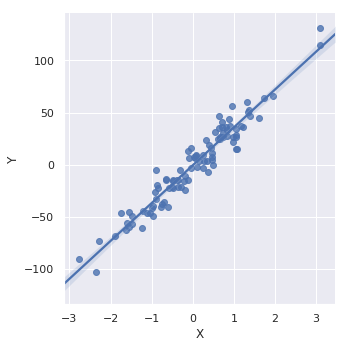

In [ ]:
# skearn做线性回归
from sklearn.datasets import make_regression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef = True)

df = pd.DataFrame(data = {'X':x_train.ravel(), 'Y':y_train.ravel()})

sns.lmplot(x='X', y='Y', data=df, fit_reg=True)
plt.show()

x_torch = torch.FloatTensor(x_train)
y_torch = torch.FloatTensor(y_train)
y_torch = y_torch.view(y_torch.size()[0], 1)

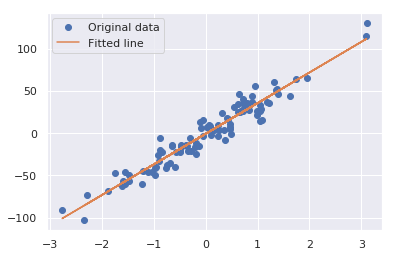

In [ ]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


for epoch in range(50):
    data, target = Variable(x_torch), Variable(y_torch)
    output = model(data)

    optimizer.zero_grad()
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

predicted = model(Variable(x_torch)).data.numpy()
# 画图
plt.plot(x_train, y_train, 'o', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

- PyTorch 具备数据加载器和处理器，可用于不同的数据集。如mnist

In [ ]:
from torchvision import datasets, transforms

batch_num_size = 64

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_num_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=batch_num_size, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8046882.95it/s]                            


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 126447.39it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2080497.05it/s]                            
0it [00:00, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 47897.95it/s]            


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


- 构建LeNet
- 用 torch.nn 库中的多个模块：
  - 1. 线性层：使用层的权重对输入张量执行线性变换；
  - 2. Conv1 和 Conv2：卷积层，每个层输出在卷积核（小尺寸的权重张量）和同样尺寸输入区域之间的点积；
  - 3. Relu：修正线性单元函数，使用逐元素的激活函数 max(0,x)；
  - 4. 池化层：使用 max 运算执行特定区域的下采样（通常 2x2 像素）；
  - 5. Dropout2D：随机将输入张量的所有通道设为零。当特征图具备强相关时，dropout2D 提升特征图之间的独立性；
  - 6. Softmax：将 Log(Softmax(x)) 函数应用到 n 维输入张量，以使输出在 0 到 1 之间。

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)

    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
# 创建对象，并移至GPU
model = LeNet()
if cuda_gpu:
    model.cuda()

print ('MNIST_net model:\n')
print (model)

MNIST_net model:

LeNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


- 要训练该模型，我们需要使用带动量的 SGD，学习率为 0.01，momentum 为 0.5。
- 仅仅需要 5 个 epoch（一个 epoch 意味着你使用整个训练数据集来更新训练模型的权重），我们就可以训练出一个相当准确的 LeNet 模型。这段代码检查可以确定文件中是否已有预训练好的模型。有则加载；无则训练一个并保存至磁盘。

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.005, momentum = 0.9)

import os

epochs = 5
if (os.path.isfile('pretrained/MNIST_net.t7')):
    print ('Loading model')
    model.load_state_dict(torch.load('pretrained/MNIST_net.t7', map_location=lambda storage, loc: storage))
    acc, loss = test(model, 1, criterion, test_loader)
else:
    print ('Training model')
    for epoch in range(1, epochs + 1):
        train(model, epoch, criterion, optimizer, train_loader)
        acc, loss = test(model, 1, criterion, test_loader)
    torch.save(model.state_dict(), 'pretrained/MNIST_net.t7')

Training model


IndexError: ignored

In [ ]:
print ('Internal models:')
for idx, m in enumerate(model.named_modules()):
    print(idx, '->', m)
    print ('-------------------------------------------------------------------------')

print (type(t.cpu().data))
if torch.cuda.is_available():
    print ("Cuda is available")
    print (type(t.cuda().data))
else:
    print ("Cuda is NOT available")
print(type(t.cpu().data.numpy()))
print(t.cpu().data.numpy().shape)
print(t.cpu().data.numpy())

Internal models:
0 -> ('', LeNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
))
-------------------------------------------------------------------------
1 -> ('conv1', Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1)))
-------------------------------------------------------------------------
2 -> ('conv2', Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1)))
-------------------------------------------------------------------------
3 -> ('conv2_drop', Dropout2d(p=0.5))
-------------------------------------------------------------------------
4 -> ('fc1', Linear(in_features=320, out_features=50, bias=True))
-------------------------------------------------------------------------
5 -> ('fc2', Linear(in_features=50, out_features=10, bias=True))
------------------

- 可视化卷积层滤波器

(10, 1, 5, 5)
(10, 5, 5)


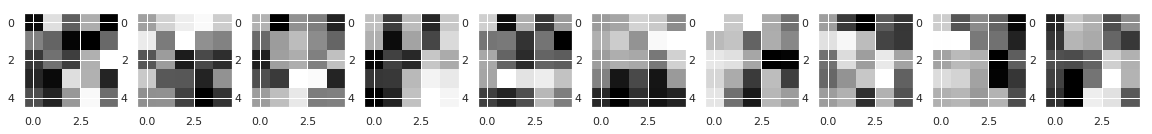

In [ ]:
data = model.conv1.weight.cpu().data.numpy()
print (data.shape)
print (data[:, 0].shape)

kernel_num = data.shape[0]

fig, axes = plt.subplots(ncols=kernel_num, figsize=(2*kernel_num, 2))

for col in range(kernel_num):
    axes[col].imshow(data[col, 0, :, :], cmap=plt.cm.gray)
plt.show()